In [1]:
!pwd

/home/rahuliyer/code/hramzan01/market/notebooks


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from energy_price_pred.energypricepred import *

/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [4]:
download_file(file, save_path)

File downloaded successfully


In [5]:
df_price, train, test = process_df(file, previous_days=30*12)

2019-05-15 23:00:00+00:00
17280
df created including time history of electricity export prices between 2023-03-26 23:00:00 and 2024-03-20 22:30:00 i.e. for the last 359 days 23:30:00 days


In [6]:
model, forecast_y_df, df_cv, df_p = ml_model(df_price, year_seasonality_mode=4)

20:09:35 - cmdstanpy - INFO - Chain [1] start processing
20:09:39 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


performing cross-validation using, initial: 180, horizon:36, and period:18


  0%|          | 0/8 [00:00<?, ?it/s]20:09:43 - cmdstanpy - INFO - Chain [1] start processing
20:09:46 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:03<00:26,  3.86s/it]20:09:47 - cmdstanpy - INFO - Chain [1] start processing
20:09:53 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:10<00:32,  5.49s/it]20:09:53 - cmdstanpy - INFO - Chain [1] start processing
20:10:00 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:17<00:31,  6.28s/it]20:10:00 - cmdstanpy - INFO - Chain [1] start processing
20:10:02 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:19<00:18,  4.69s/it]20:10:03 - cmdstanpy - INFO - Chain [1] start processing
20:10:04 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:21<00:10,  3.61s/it]20:10:04 - cmdstanpy - INFO - Chain [1] start processing
20:10:07 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:25<00:07,  3.54s/it]20:10:08 - cmds

In [7]:
type(df_price['ds'][df_price.index[0]])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
df_price.tail()

,ds,y
85002,2024-03-20 20:30:00,7.81
85003,2024-03-20 21:00:00,8.42
85004,2024-03-20 21:30:00,8.52
85005,2024-03-20 22:00:00,8.80
85006,2024-03-20 22:30:00,7.48


In [9]:
date1 = datetime.strptime('2024-03-20 20:30:00', "%Y-%m-%d %H:%M:%S")
date2 = datetime.strptime('2024-03-20 22:30:00', "%Y-%m-%d %H:%M:%S")
forecast_y_df[(forecast_y_df['ds']>= date1)  & (forecast_y_df['ds']<=date2)]

,ds,yhat,yhat_lower,yhat_upper
17275,2024-03-20 20:30:00,7.966468,3.671503,11.970395
17276,2024-03-20 21:00:00,7.576720,3.509984,11.826164
17277,2024-03-20 21:30:00,7.448837,3.386411,11.701058
17278,2024-03-20 22:00:00,7.491791,3.330431,11.896259
17279,2024-03-20 22:30:00,7.592018,3.826605,11.899296


In [10]:
pred_y_df,date1, date2, forecast_days = pred(df_price, model, forecast_start_date='2024-03-19', forceast_end_date='2024-03-25')

6


In [11]:
pred_y_df.tail()

,ds,yhat,yhat_lower,yhat_upper
17419,2024-03-26 18:30:00,11.858741,7.882974,16.338811
17420,2024-03-26 19:30:00,9.626297,5.478713,13.787992
17421,2024-03-26 20:30:00,8.020511,3.702865,12.094046
17422,2024-03-26 21:30:00,7.518906,3.380392,11.761678
17423,2024-03-26 22:30:00,7.657134,3.376257,11.923289


In [12]:
date1, date2, forecast_days

(datetime.date(2024, 3, 25), datetime.date(2024, 3, 19), 6)

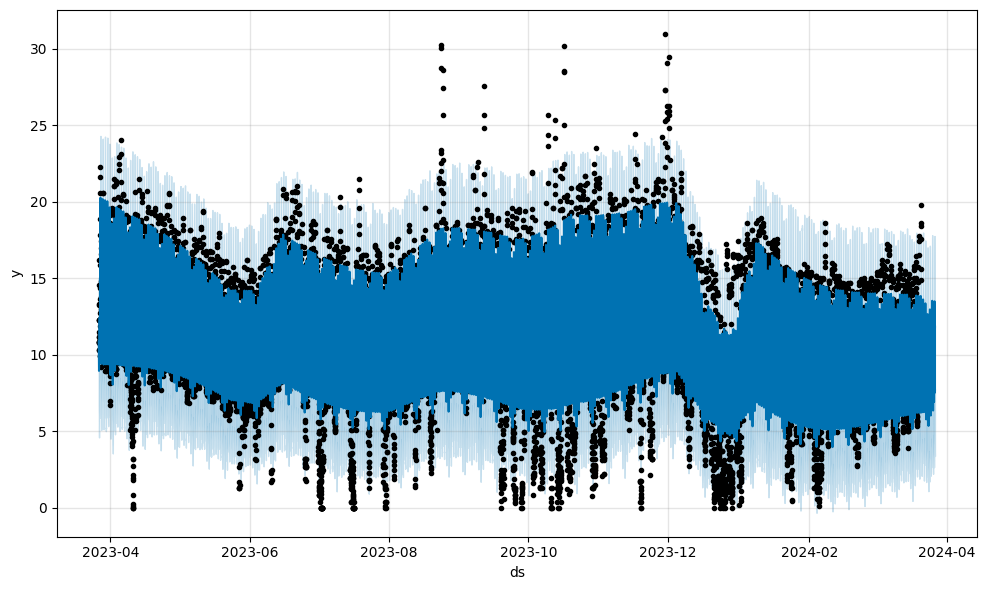

In [13]:
ax = model.plot(pred_y_df)

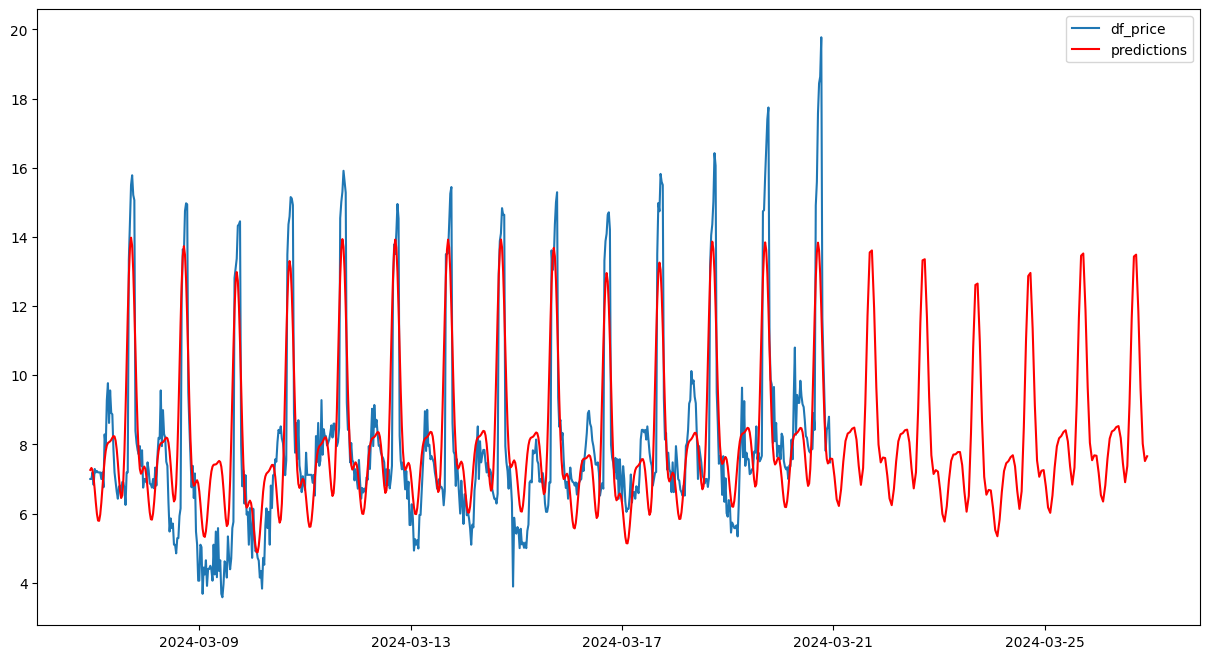

In [14]:
import matplotlib.pyplot as plt

days =14

date = df_price['ds'][df_price.index[-1]]- timedelta(days=days)
date_end = date + timedelta(days=days+days)
# date
df_price_date=df_price.loc[df_price['ds'] >= date ].copy()
forecast_date=pred_y_df.loc[(pred_y_df['ds'] >= date ) & (pred_y_df['ds'] <= date_end)].copy()

plt.figure(figsize=(15,8))
plt.plot(df_price_date['ds'], df_price_date['y'], label='df_price')
plt.plot(forecast_date['ds'], forecast_date['yhat'], label='predictions', color = 'red')
plt.legend(loc='best')

In [15]:
df_p.tail()

,horizon,mse,rmse,mae,mdape,smape,coverage
1551,35 days 22:00:00,178.086479,13.344905,10.992580,1.063823,1.093447,0.486252
1552,35 days 22:30:00,178.205389,13.349359,10.998137,1.064103,1.094156,0.486252
1553,35 days 23:00:00,178.211558,13.349590,10.999899,1.064103,1.094832,0.486252
1554,35 days 23:30:00,178.192555,13.348878,11.001321,1.072340,1.095585,0.486252
1555,36 days 00:00:00,178.152260,13.347369,11.000903,1.073571,1.096320,0.486252


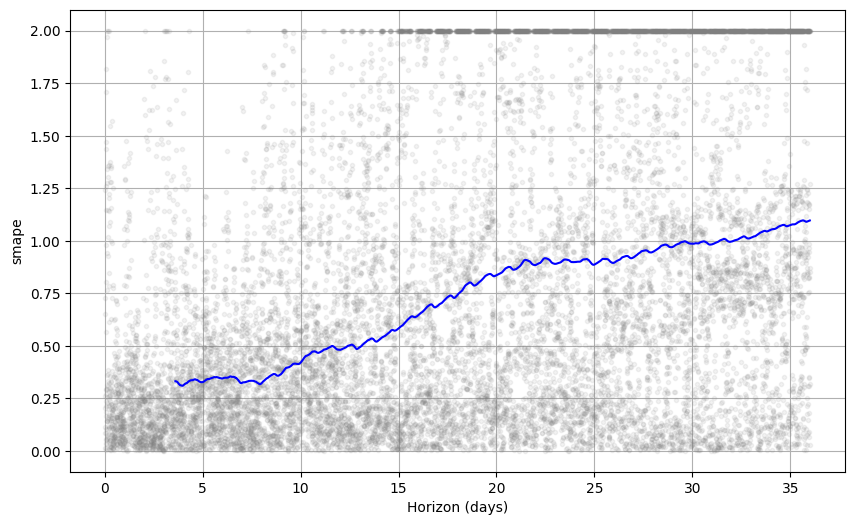

In [16]:
fig = plot_cross_validation_metric(df_cv, metric='smape')

In [17]:
df_price, train, test = process_df(file, previous_days=30*18)

2019-05-15 23:00:00+00:00
25920
df created including time history of electricity export prices between 2022-09-27 23:00:00 and 2024-03-20 22:30:00 i.e. for the last 539 days 23:30:00 days


In [18]:
model, forecast_y_df, df_cv, df_p = ml_model(df_price, forecast_days=14, year_seasonality_mode=4, freq='H')

20:10:21 - cmdstanpy - INFO - Chain [1] start processing
20:10:32 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


performing cross-validation using, initial: 270, horizon:54, and period:27


  0%|          | 0/8 [00:00<?, ?it/s]20:10:36 - cmdstanpy - INFO - Chain [1] start processing
20:10:40 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:04<00:34,  4.88s/it]20:10:41 - cmdstanpy - INFO - Chain [1] start processing
20:10:45 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:09<00:27,  4.58s/it]20:10:46 - cmdstanpy - INFO - Chain [1] start processing
20:10:52 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:16<00:29,  5.91s/it]20:10:53 - cmdstanpy - INFO - Chain [1] start processing
20:10:58 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:22<00:23,  5.90s/it]20:10:59 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing
 62%|██████▎   | 5/8 [00:29<00:18,  6.32s/it]20:11:06 - cmdstanpy - INFO - Chain [1] start processing
20:11:12 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 6/8 [00:36<00:13,  6.65s/it]20:11:14 - cmds

In [19]:
pred_y_df,date1, date2, forecast_days = pred(df_price, model, forecast_start_date='2024-03-19', forceast_end_date='2024-03-31')

12


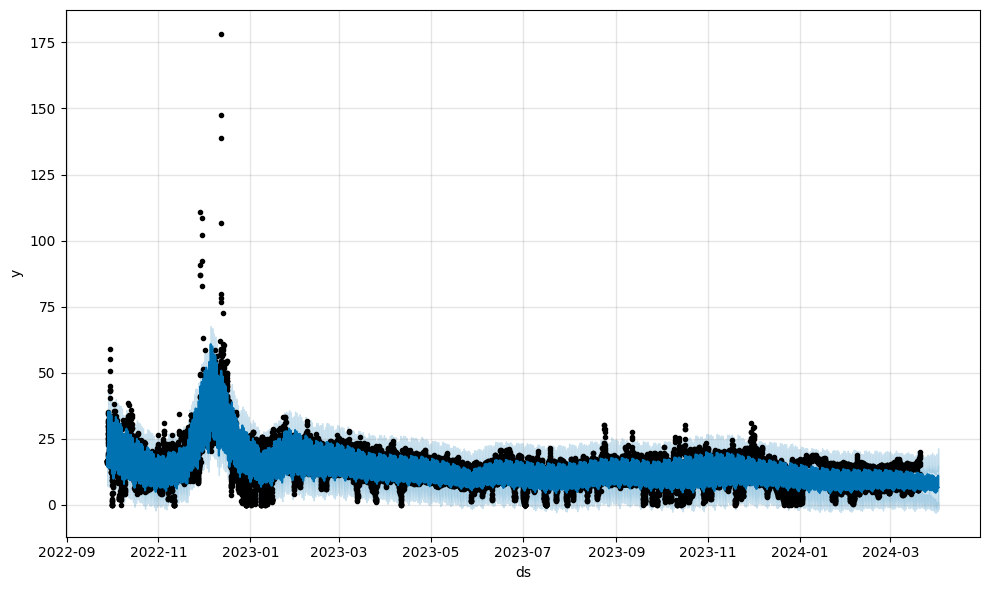

In [20]:
ax = model.plot(pred_y_df)

In [28]:
df_price

,ds,y
59087,2022-09-27 23:00:00,16.20
59088,2022-09-27 23:30:00,15.59
59089,2022-09-28 00:00:00,16.60
59090,2022-09-28 00:30:00,16.60
59091,2022-09-28 01:00:00,16.60
...,...,...
85002,2024-03-20 20:30:00,7.81
85003,2024-03-20 21:00:00,8.42
85004,2024-03-20 21:30:00,8.52
85005,2024-03-20 22:00:00,8.80


In [27]:
pred_y_df

,ds,yhat,yhat_lower,yhat_upper
0,2022-09-27 23:00:00,18.222254,11.502843,25.140374
1,2022-09-27 23:30:00,18.272664,11.488030,25.668309
2,2022-09-28 00:00:00,17.965289,10.971127,25.184872
3,2022-09-28 00:30:00,17.293893,10.245020,23.993971
4,2022-09-28 01:00:00,16.377046,9.374423,23.202848
...,...,...,...,...
26203,2024-04-01 18:30:00,9.937580,0.510377,18.685801
26204,2024-04-01 19:30:00,8.271378,-0.353344,17.699787
26205,2024-04-01 20:30:00,6.897744,-1.417182,14.312094
26206,2024-04-01 21:30:00,6.326987,-1.707479,14.094602


In [22]:
import matplotlib.pyplot as plt

days =14

date = df_price['ds'][df_price.index[-1]]- timedelta(days=days)
date_end = date + timedelta(days=days+days)
# date
df_price_date=df_price.loc[df_price['ds'] >= date ].copy()
forecast_date=pred_y_df.loc[(pred_y_df['ds'] >= date ) & (pred_y_df['ds'] <= date_end)].copy()
# test_date=test.loc[test['ds'] <= date_end ].copy()

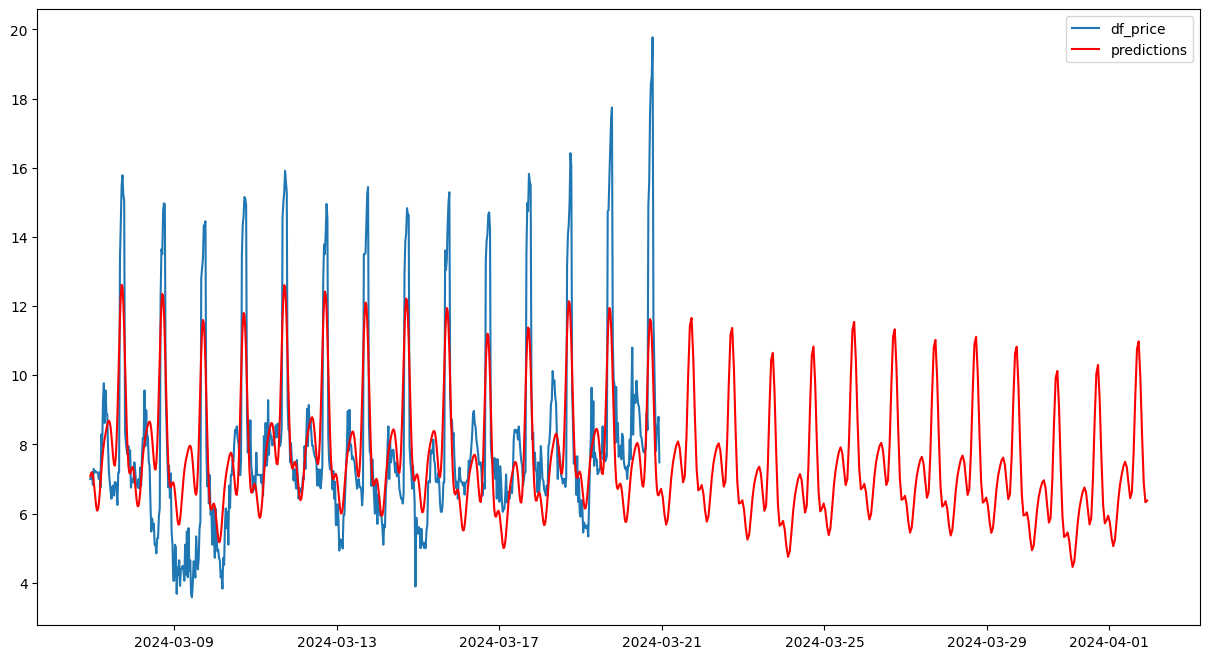

In [23]:
plt.figure(figsize=(15,8))
plt.plot(df_price_date['ds'], df_price_date['y'], label='df_price')
plt.plot(forecast_date['ds'], forecast_date['yhat'], label='predictions', color = 'red')
plt.legend(loc='best')

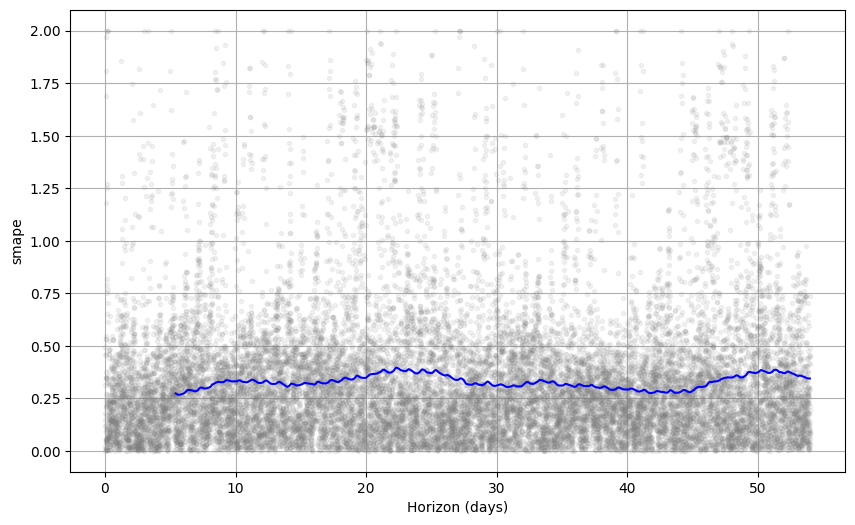

In [24]:
fig = plot_cross_validation_metric(df_cv, metric='smape')

In [25]:
"""Energy price pred package returns selling price of electricity (back to grid)

To install, copy the package folder: energy_price_pred

pip install . (from the shell to install package)

###### then run the following commands #########

from energy_price_pred.energypricepred import *

download_file(file, save_path)

df_price, train, test = process_df(file, previous_days=30*18)   ### example uses last 18 months and returns electricity selling price dataframe with splits

model, forecast_y_df, df_cv, df_p = ml_model(df_price, forecast_days=14, year_seasonality_mode=4) ### returns trained model

pred_y_df,date1, date2, forecast_days = pred(df_price, model, forecast_start_date='2024-03-19', forceast_end_date='2024-03-31') ### returns forecasted electricity selling price pred_y_df

### Hourly selling price of electricity is obtained as follows,

hourly_selling_data = pred_y_df.resample('H', on='ds').mean()

hourly_buying_data = 2*hourly_selling_data

"""


'Energy price pred package returns selling price of electricity (back to grid)\n\nTo install, copy the package folder: energy_price_pred\n\npip install . (from the shell to install package)\n\n###### then run the following commands #########\n\nfrom energy_price_pred.energypricepred import *\n\n\n'

In [30]:
hourly_data = pred_y_df.resample('H', on='ds').mean()

In [31]:
hourly_data

,yhat,yhat_lower,yhat_upper
ds,,,
2022-09-27 23:00:00,18.247459,11.495437,25.404341
2022-09-28 00:00:00,17.629591,10.608074,24.589421
2022-09-28 01:00:00,15.896279,8.977024,22.698357
2022-09-28 02:00:00,14.421904,7.525595,21.425890
2022-09-28 03:00:00,14.506575,7.256167,21.430618
...,...,...,...
2024-04-01 18:00:00,9.937580,0.510377,18.685801
2024-04-01 19:00:00,8.271378,-0.353344,17.699787
2024-04-01 20:00:00,6.897744,-1.417182,14.312094
